In [1]:
# !pip install requests

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from IPython.display import Image, display


In [53]:
match_stats = pd.read_csv('csgo_round_snapshots.csv')

In [54]:
match_stats.shape

(122410, 97)

In [55]:
match_stats.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [56]:
# match_stats(32)

match_stats.columns[80]

'ct_weapon_p2000'

In [57]:
match_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

Text(0, 0.5, 'Count')

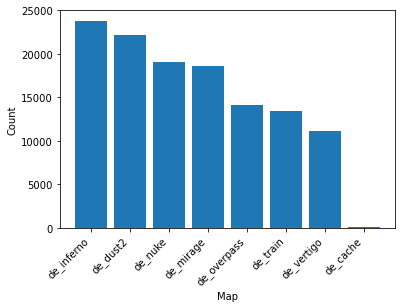

In [58]:
# Map Picks to see which is the most popular maps
counts = match_stats['map'].value_counts()
total = counts.sum()
percentage = counts / total * 100

plt.bar(counts.index, counts.values)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Map')

plt.ylabel('Count')

In [59]:
for map_name, count, percent in zip(counts.index, counts.values, percentage.values):
    print(f'{map_name}: {percent:.2f}%','/',count)

de_inferno: 19.45% / 23811
de_dust2: 18.09% / 22144
de_nuke: 15.54% / 19025
de_mirage: 15.18% / 18576
de_overpass: 11.50% / 14081
de_train: 11.02% / 13491
de_vertigo: 9.10% / 11137
de_cache: 0.12% / 145


In [60]:
# We can see the maps that most popular among pros, Context is important here 
# because one would assume cache most be completely hated however, although not
# confirm, but I believe this is recorded among the time that the map was removed
# from rotation and vertigo is brought in
# It was worth noting that might be the reason why vertigo is the next least popular
# as players are still understanding the maps.

In [61]:
# Diving deeper into inferno

In [62]:
inferno_matches = match_stats[match_stats['map'] == 'de_inferno']

total_rounds = len(inferno_matches)

round_winner_count = inferno_matches.groupby('round_winner').size()

ct_per = round_winner_count['CT'] / total_rounds * 100
t_per = round_winner_count['T'] / total_rounds * 100

print(f"Percentage of CT round winners on de_inferno: {ct_per:.2f}%")
print(f"Percentage of T round winners on de_inferno: {t_per:.2f}%")

Percentage of CT round winners on de_inferno: 45.40%
Percentage of T round winners on de_inferno: 54.60%


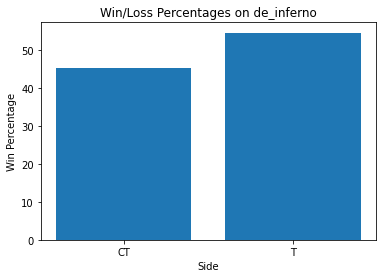

In [63]:
plt.bar(['CT', 'T'], [ct_per, t_per])
plt.title('Win/Loss Percentages on de_inferno')
plt.xlabel('Side')
plt.ylabel('Win Percentage')
plt.show()

In [64]:
# From this we can determine the maps are T-sided

# Teams can make more informed decision if they would prefer to start the on t/ct

In [65]:
# Diving deeper on the T round wins on Inferno
t_wins = match_stats[match_stats['round_winner'] == 'T']

t_wins_with_bomb_planted = t_wins[t_wins['bomb_planted'] == True]

t_wins_with_bomb_planted_on_inferno = t_wins_with_bomb_planted[t_wins_with_bomb_planted['map'] == 'de_inferno']

percentage_t_wins = len(t_wins_with_bomb_planted_on_inferno) / len(t_wins[t_wins['map'] == 'de_inferno']) * 100

In [66]:
print(f"The percentage of T wins with the bomb planted on de_inferno is {percentage_t_wins:.2f}%")

The percentage of T wins with the bomb planted on de_inferno is 19.18%


In [67]:
# This informs us that not majority of rounds won neccessarily because bomb plants
# so this might inform teams to be less focus on the bomb plant and perhaps be more
# focus on elims

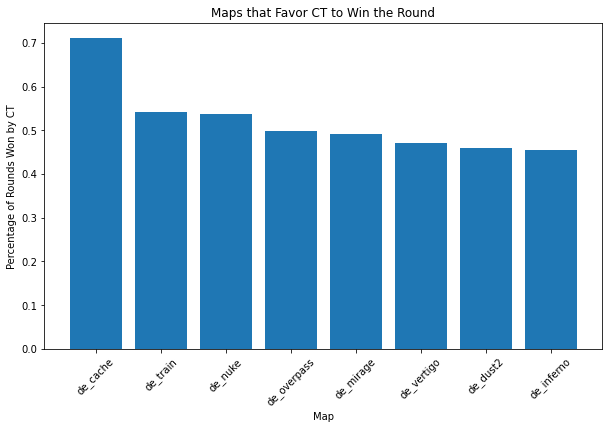

In [68]:
map_win_pct = match_stats.groupby(['map', 'round_winner'])['round_winner'].count().unstack() / match_stats.groupby('map')['map'].count().values.reshape(-1, 1)
ct_win_pct = map_win_pct['CT']

ct_win_pct = ct_win_pct.sort_values(ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(ct_win_pct.index, ct_win_pct)
plt.xticks(rotation=45)
plt.xlabel('Map')
plt.ylabel('Percentage of Rounds Won by CT')
plt.title('Maps that Favor CT to Win the Round')
plt.show()

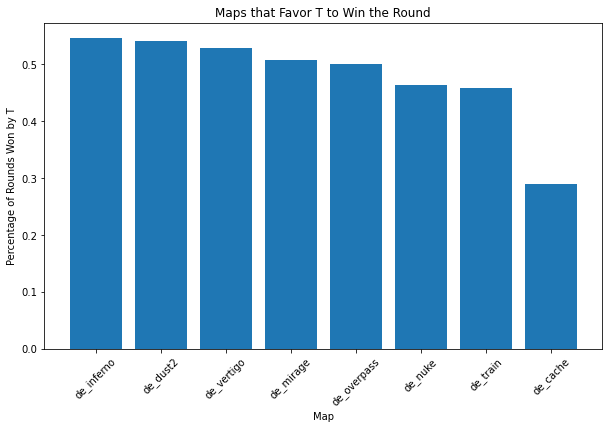

In [69]:
map_win_pct = match_stats.groupby(['map', 'round_winner'])['round_winner'].count().unstack() / match_stats.groupby('map')['map'].count().values.reshape(-1, 1)
t_win_pct = map_win_pct['T']

t_win_pct = t_win_pct.sort_values(ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(t_win_pct.index, t_win_pct)
plt.xticks(rotation=45)
plt.xlabel('Map')
plt.ylabel('Percentage of Rounds Won by T')
plt.title('Maps that Favor T to Win the Round')
plt.show()

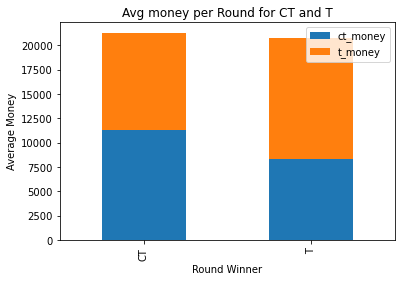

In [70]:
# Looking at economy
money_data = match_stats.groupby('round_winner')[['ct_money', 't_money']].mean()

money_data.plot(kind='bar', stacked=True)
plt.title("Avg money per Round for CT and T")
plt.xlabel('Round Winner')
plt.ylabel('Average Money')
plt.show()

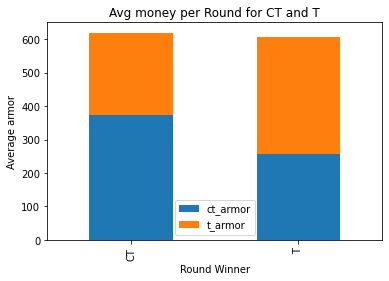

In [71]:
money_data = match_stats.groupby('round_winner')[['ct_armor', 't_armor']].mean()

money_data.plot(kind='bar', stacked=True)
plt.title("Avg Armor per Round for CT and T")
plt.xlabel('Round Winner')
plt.ylabel('Average armor')
plt.show()

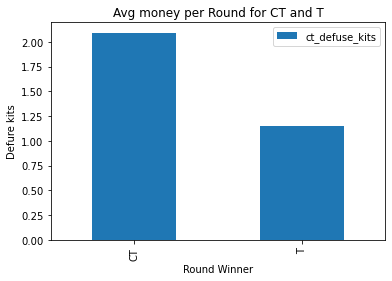

In [72]:
dkit_data = match_stats.groupby('round_winner')[['ct_defuse_kits']].mean()

dkit_data.plot(kind='bar', stacked=True)
plt.title("Avg money per Round for CT and T")
plt.xlabel('Round Winner')
plt.ylabel('Defure kits')
plt.show()

In [73]:
# From this we can see that often the team that invest the most on their utility
# would often be the one win the round. With wins leads to be more economy, however
# economy is not that straightforward therefore various eco strats are introduced
# to maintain good eco.

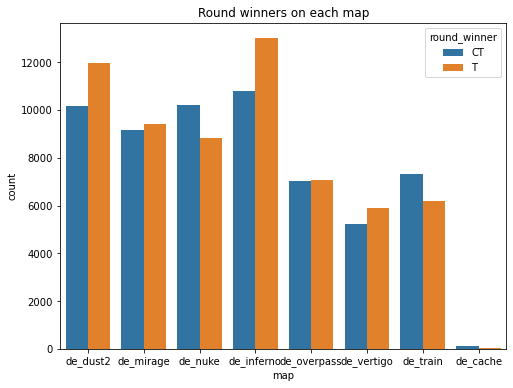

In [74]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.countplot(x="map", hue="round_winner", data=match_stats)
ax.set(title='Round winners on each map')
plt.show()

In [75]:
match_stats.isnull().sum() # finding nulls


time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='round_winner', ylabel='count'>

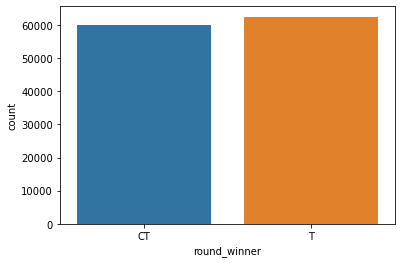

In [76]:
# import seaborn as sns
sns.countplot(match_stats['round_winner'])

In [77]:
# checking for columns for only one value

col = match_stats.columns

t = []
for i in col:
    t.append(match_stats[i].nunique())

In [78]:
# all the columns with only one value
temp =[]
for i in range(len(t)):
    if t[i]==1:
        temp.append(i)
        print(i)

22
30
37
52
58
60


In [79]:
print(col[22])
print(col[30])
print(col[37])
print(col[52])
print(col[58])
print(col[60])

ct_weapon_bizon
ct_weapon_g3sg1
t_weapon_m249
ct_weapon_negev
ct_weapon_r8revolver
ct_weapon_sawedoff


In [80]:
match_stats['ct_weapon_bizon'].unique()

array([0.])

In [81]:
match_stats.drop([col[22], col[30], col[37], col[52], col[58], col[60]], axis = 1, inplace = True) 
# dropping those columns as they basically useless, The reason columns only containing 0 value is because these weapons are not good hence they are never bought or used.

In [82]:
match_stats.shape

(122410, 91)

In [86]:
for i in match_stats.columns:
    if match_stats[i].dtype != 'float64':
        print(match_stats[i].value_counts())

de_inferno     23811
de_dust2       22144
de_nuke        19025
de_mirage      18576
de_overpass    14081
de_train       13491
de_vertigo     11137
de_cache         145
Name: map, dtype: int64
False    108726
True      13684
Name: bomb_planted, dtype: int64
T     62406
CT    60004
Name: round_winner, dtype: int64


In [87]:
print(match_stats[['map','bomb_planted','round_winner']])

             map  bomb_planted round_winner
0       de_dust2         False           CT
1       de_dust2         False           CT
2       de_dust2         False           CT
3       de_dust2         False           CT
4       de_dust2         False           CT
...          ...           ...          ...
122405  de_train          True            T
122406  de_train         False            T
122407  de_train         False            T
122408  de_train         False            T
122409  de_train         False            T

[122410 rows x 3 columns]


In [88]:
match_stats['map'].unique()

array(['de_dust2', 'de_mirage', 'de_nuke', 'de_inferno', 'de_overpass',
       'de_vertigo', 'de_train', 'de_cache'], dtype=object)

In [89]:
# Label Encoding and Normalization

# Label Encoding - converting the labels into a numeric form so as to convert them into the machine-readable form.

In [90]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() 
match_stats['map'] = label_encoder.fit_transform(match_stats['map'])

In [91]:
match_stats['map'].unique()

array([1, 3, 4, 2, 5, 7, 6, 0])

In [102]:
match_stats['bomb_planted'] = label_encoder.fit_transform(match_stats['bomb_planted'])
match_stats['round_winner'] = label_encoder.fit_transform(match_stats['round_winner'])

In [103]:
match_stats.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [104]:
col = match_stats.columns

c = []
for i in col:
    c.append(match_stats['round_winner'].corr(match_stats[i]))

In [105]:
# Standardized/Normalized as 

# Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a 
# bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.
# Standardizes a feature by subtracting the mean and then scaling to unit variance.

In [106]:
standscl = preprocessing.StandardScaler()

In [107]:
standscl.fit(match_stats)

StandardScaler()

In [108]:
standscl.transform(match_stats)

array([[ 1.41582771, -1.40057607, -1.40570151, ..., -0.16335636,
        -0.15685461, -1.01981894],
       [ 1.06753073, -1.40057607, -1.40570151, ..., -0.16335636,
        -0.15685461, -1.01981894],
       [-0.03409385, -1.40057607, -1.40570151, ..., -0.16335636,
        -0.15685461, -1.01981894],
       ...,
       [ 0.31291789,  0.89571055,  1.70405824, ..., -0.16335636,
        -0.15685461,  0.98056622],
       [-0.0542903 ,  0.89571055,  1.70405824, ..., -0.16335636,
        -0.15685461,  0.98056622],
       [-0.4214985 ,  0.89571055,  1.70405824, ..., -0.16335636,
        -0.15685461,  0.98056622]])

In [109]:
df = standscl.transform(match_stats)

In [110]:
df = pd.DataFrame(df, columns = col)

In [111]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,1.415828,-1.400576,-1.405702,-1.30641,-0.354764,0.664386,0.695301,-1.836777,-1.709542,-0.516186,...,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819
1,1.067531,-1.400576,-1.405702,-1.30641,-0.354764,0.664386,0.695301,0.502008,0.008909,-0.819351,...,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819
2,-0.034094,-1.400576,-1.405702,-1.30641,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,...,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819
3,-0.401302,-1.400576,-1.405702,-1.30641,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,...,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819
4,1.415277,-1.191823,-1.405702,-1.30641,-0.354764,0.664386,0.695301,-0.714160,-1.709542,0.763351,...,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819


In [112]:
df['round_winner'] = label_encoder.fit_transform(df['round_winner'])

In [113]:
x = df.drop('round_winner', axis = 1)

In [114]:
x.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1.415828,-1.400576,-1.405702,-1.30641,-0.354764,0.664386,0.695301,-1.836777,-1.709542,-0.516186,...,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
1,1.067531,-1.400576,-1.405702,-1.30641,-0.354764,0.664386,0.695301,0.502008,0.008909,-0.819351,...,-1.045338,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
2,-0.034094,-1.400576,-1.405702,-1.30641,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,...,-1.045338,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
3,-0.401302,-1.400576,-1.405702,-1.30641,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,...,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
4,1.415277,-1.191823,-1.405702,-1.30641,-0.354764,0.664386,0.695301,-0.714160,-1.709542,0.763351,...,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855


In [115]:
y = df['round_winner']

In [116]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: round_winner, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neural_network import MLPClassifier 

model_1 = LogisticRegression()
model_1.fit(x_train,y_train)
pred_1 = model_1.predict(x_test)
cr1    = classification_report(y_test,pred_1)
print("Logistic Regression Performance")
print(cr1)

Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.74      0.76      0.75     12004
           1       0.76      0.74      0.75     12478

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482



In [119]:
model_2 = DecisionTreeClassifier()
model_2.fit(x_train,y_train)
pred_2 = model_2.predict(x_test)
cr2 = classification_report(y_test,pred_2)
print(cr2)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     12004
           1       0.82      0.82      0.82     12478

    accuracy                           0.82     24482
   macro avg       0.82      0.82      0.82     24482
weighted avg       0.82      0.82      0.82     24482



In [120]:
model_3 = RandomForestClassifier()
model_3.fit(x_train,y_train)
pred_3 = model_3.predict(x_test)
cr3 = classification_report(y_test,pred_3)
print(cr3)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     12004
           1       0.89      0.87      0.88     12478

    accuracy                           0.88     24482
   macro avg       0.88      0.88      0.88     24482
weighted avg       0.88      0.88      0.88     24482



In [121]:
print('Optimal accuracy is random forest classifier:', str(accuracy_score(y_test,pred_3)*100) + '%')

Optimal accuracy is random forest classifier: 87.96666938975574%


# Logistic Regression / Decision Tree / Random Forest

### Logistic Regression
predict the probability that an instance of belonging to a given class or not. It gives you the probability value which could lead to it falling to either category, In this instance values <0.5 = 0  & >0.5 = 1
which analyze the relationship between a set of independent variables and the dependent binary variables.


### Decision Tree


### Random Forest
Extension of decision Trees, Imagine a many2 decision trees, that may check higher importance features first hence better modelling thus yielding higher accuracy
Note that random forest classification is capable of randomly selecting subsets of features, some trees of the forest can isolate more important features while increasing the overall accuracy of the result.


RESULTS - Random Forest is the best, likely because its a classification dataset

Categorical data works well with Decision Trees, while continuous data work well with Logistic Regression.

Logistic Regression does not handle skewed classes well. So, in this case, either increase the weight to the minority class or balance the class.

Random Forest takes into acc skewness


The data doesnt seem to be linearly seperable, We can try visualising this

Logistic regression which handles linearly seperable data.

In [122]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test,pred_3)
print(cm3)

[[10686  1318]
 [ 1628 10850]]


In [123]:
models = []
models.append(LogisticRegression())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())

In [124]:
from sklearn.model_selection import cross_val_score
accuracy_models=[]
cross_val_scores=[]
for m in models:
    m.fit(x_train,y_train)
    y_hat = m.predict(x_test)
    accuracy_models.append(accuracy_score(y_test,y_hat))
    cross_val_scores.append(cross_val_score(m,x,y,cv=5,scoring='accuracy', n_jobs=-1).mean())

In [125]:
results = {'Models': models,
          'Accuracy Score': accuracy_models,
          'Cross Validation Score': cross_val_scores}

results=pd.DataFrame(results)
results

,Models,Accuracy Score,Cross Validation Score
0,LogisticRegression(),0.749816,0.745928
1,DecisionTreeClassifier(),0.818928,0.700449
2,"(DecisionTreeClassifier(max_features='auto', r...",0.878482,0.750600


Cross validation is a technique used in machine learning to evaluate the performance of a model on unseen data. or to detect overfitting.

Its hard to claim the model works for training data therefore it is certain to fit real data.

In [126]:
match_stats.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [128]:
match_stats.corr(method ='pearson')

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
time_left,1.000000,0.000381,-0.003067,0.008872,-0.486048,0.684514,0.678952,-0.089950,-0.195579,0.374530,...,0.007462,0.108141,0.036235,0.128073,0.004142,0.058112,0.044942,0.010688,0.018366,-0.068994
ct_score,0.000381,1.000000,0.626726,-0.001361,-0.015707,0.016495,-0.010987,0.100518,0.034789,0.249416,...,0.051485,0.136987,0.038498,0.152342,0.008133,0.051174,0.062015,-0.011149,-0.004670,-0.057304
t_score,-0.003067,0.626726,1.000000,-0.003357,-0.010080,0.002840,0.001720,0.035370,0.081671,0.069768,...,0.118714,0.058564,0.104194,0.049208,0.011222,0.030615,0.144589,0.016507,-0.026379,0.026863
map,0.008872,-0.001361,-0.003357,1.000000,-0.025656,-0.001081,-0.006717,0.003777,-0.010546,0.015208,...,0.020549,0.043258,-0.014660,0.013318,0.004504,-0.001805,-0.008635,-0.001283,-0.013171,-0.038161
bomb_planted,-0.486048,-0.015707,-0.010080,-0.025656,1.000000,-0.619132,-0.448040,-0.281474,-0.096619,-0.190107,...,-0.197067,-0.217222,-0.231708,-0.192438,0.015815,-0.022317,-0.220578,-0.033638,-0.024219,0.187101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ct_grenade_molotovgrenade,0.058112,0.051174,0.030615,-0.001805,-0.022317,0.046761,0.016732,0.080041,-0.068558,0.114220,...,-0.027156,0.110894,-0.018945,0.061805,-0.020062,1.000000,-0.015560,-0.007780,-0.005318,-0.079758
t_grenade_molotovgrenade,0.044942,0.062015,0.144589,-0.008635,-0.220578,0.262061,0.312744,0.292294,0.639853,-0.054578,...,0.818655,0.376916,0.812387,0.335175,0.011937,-0.015560,1.000000,0.053987,0.007665,0.116754
ct_grenade_decoygrenade,0.010688,-0.011149,0.016507,-0.001283,-0.033638,0.046326,0.036673,0.096492,0.030713,-0.086894,...,0.046699,0.068453,0.051160,0.030878,-0.009436,-0.007780,0.053987,1.000000,0.010776,-0.022678
t_grenade_decoygrenade,0.018366,-0.004670,-0.026379,-0.013171,-0.024219,0.033921,0.046655,0.042389,0.083507,-0.023366,...,0.035920,0.030765,0.046719,0.040710,-0.013646,-0.005318,0.007665,0.010776,1.000000,0.023998


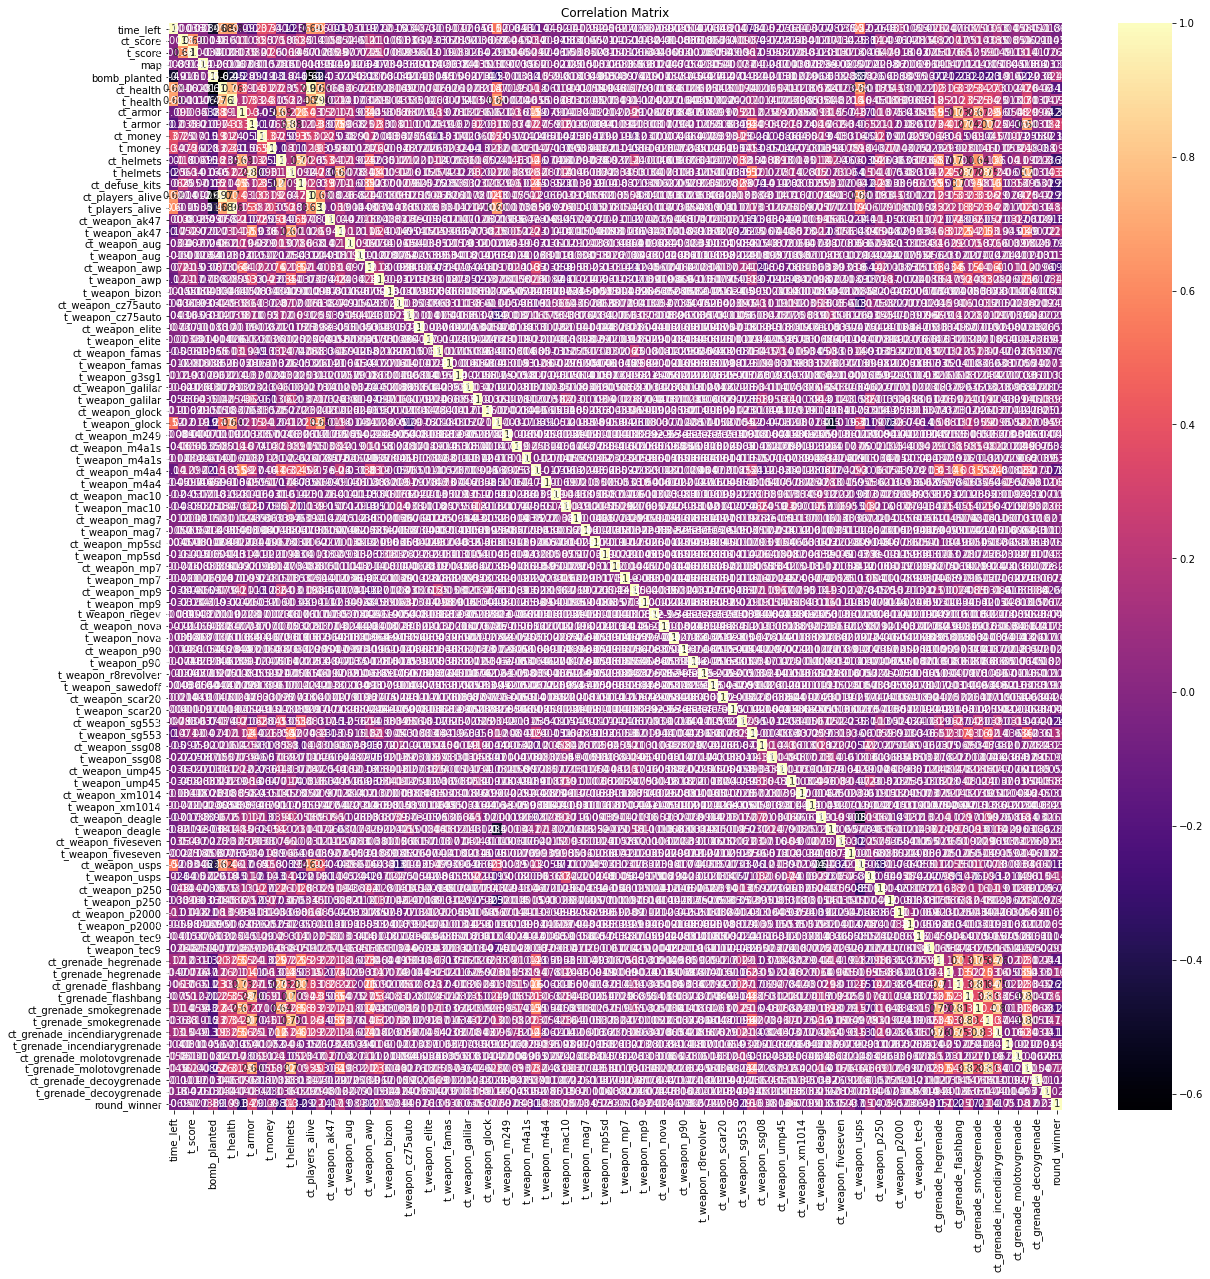

In [129]:
plt.figure(figsize=(20,20))
corr_matrix = match_stats.corr()

sns.heatmap(corr_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

## Feature Selection
Feature selection allows for identification of the most important or influencing factors on the response (or dependent) variable. In this example, feature selection techniques are used to predict the most important influencing factors on whether the team wins the round.

By employing this method, the exhaustive dataset can be reduced in size by pruning away the redundant features that reduce the model’s accuracy. Doing this will help curtail the computational expense of modeling and in some cases may also boost the accuracy of the implemented model.

In [131]:
import numpy as np
importances = models[2].feature_importances_
indices = np.argsort(importances)

In [132]:
x_train.columns[indices]

Index(['ct_weapon_m249', 't_weapon_scar20', 't_weapon_mag7',
       't_weapon_r8revolver', 't_weapon_negev', 't_weapon_bizon',
       't_weapon_nova', 'ct_weapon_p90', 't_weapon_p90', 't_weapon_sawedoff',
       't_weapon_xm1014', 't_weapon_g3sg1', 'ct_weapon_scar20',
       'ct_weapon_mp5sd', 'ct_weapon_nova', 't_weapon_mp5sd', 't_weapon_mp7',
       't_weapon_elite', 't_weapon_famas', 't_weapon_m4a1s', 'ct_weapon_mp7',
       't_weapon_mp9', 't_weapon_p2000', 'ct_weapon_mag7', 'ct_weapon_mac10',
       't_weapon_aug', 'ct_weapon_tec9', 't_weapon_fiveseven',
       'ct_weapon_galilar', 'ct_weapon_elite', 'ct_weapon_glock',
       'ct_weapon_xm1014', 't_grenade_incendiarygrenade', 't_weapon_ssg08',
       't_weapon_tec9', 't_weapon_ump45', 't_grenade_decoygrenade',
       'ct_grenade_molotovgrenade', 'ct_grenade_decoygrenade',
       'ct_weapon_ssg08', 'ct_weapon_ump45', 't_weapon_m4a4',
       'ct_weapon_fiveseven', 't_weapon_mac10', 'ct_weapon_m4a1s',
       't_weapon_cz75auto', 't_w

In [140]:
print(x_train.columns[indices][-1])
print(x_train.columns[indices][-2])
print(x_train.columns[indices][-3])
print(x_train.columns[indices][-4])
print(x_train.columns[indices][-5])
print(x_train.columns[indices][-6])
print(x_train.columns[indices][-7])
print(x_train.columns[indices][-8])
print(x_train.columns[indices][-9])
print(x_train.columns[indices][-10])

t_armor
ct_armor
ct_money
t_money
t_helmets
time_left
t_health
ct_helmets
t_score
ct_score


Text(0.5, 1.0, 'Importance of the Columns')

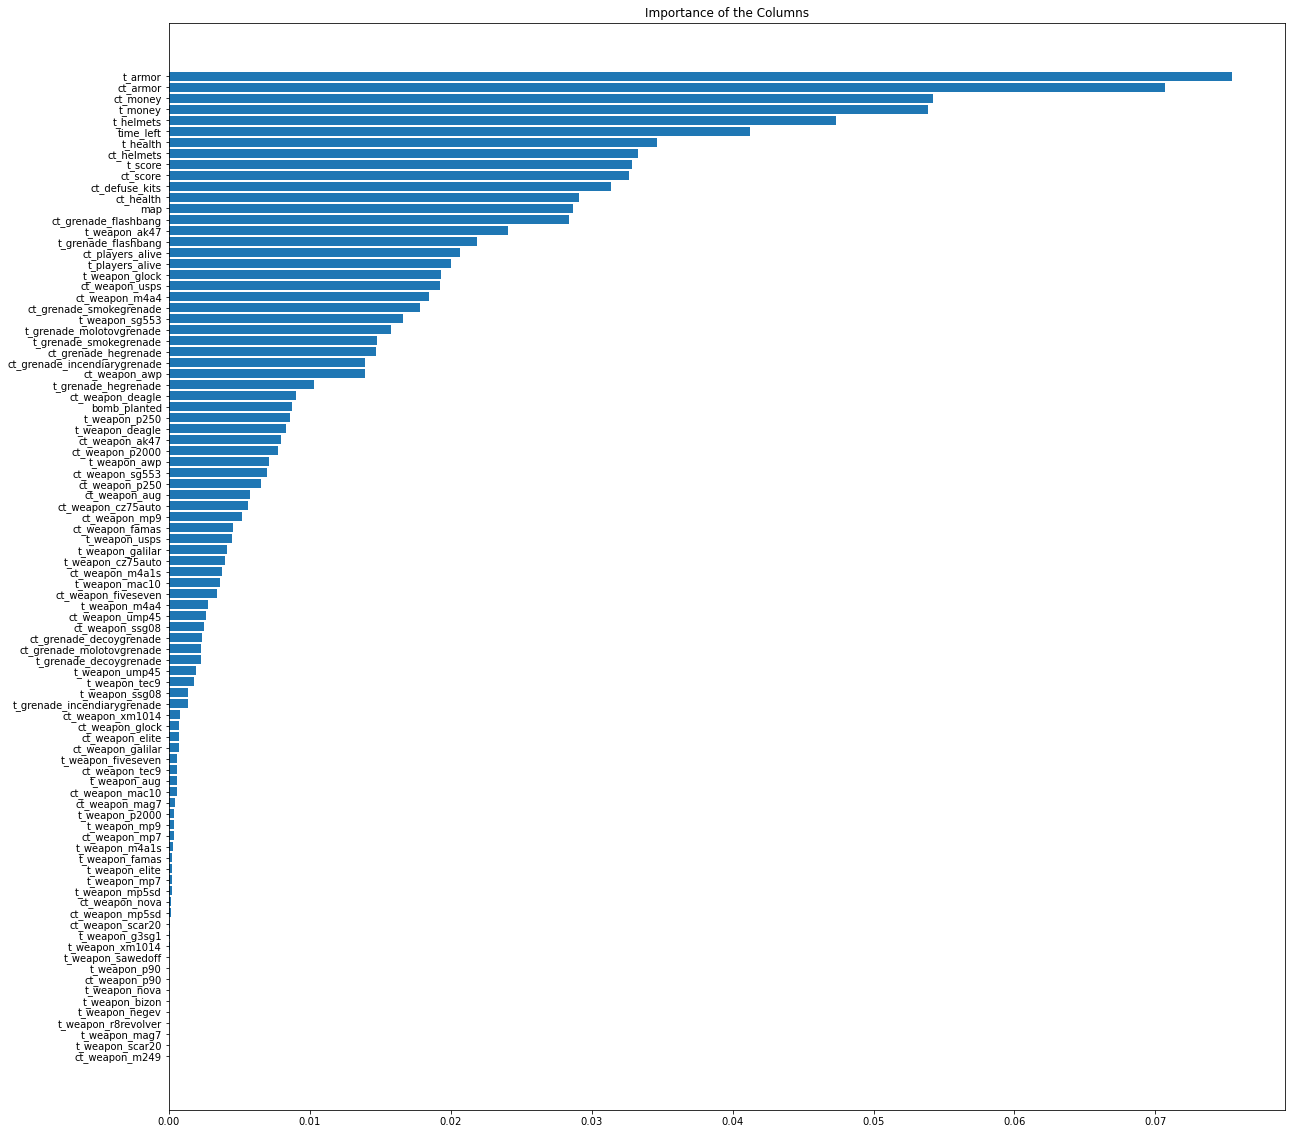

In [134]:
plt.figure(figsize = (20,20))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), x_train.columns[indices])
plt.title('Importance of the Columns')

In [90]:
# match_stats.info()

In [ ]:
# df_age = df_clean['player_age']
# df2 = df[['Courses', 'Fee']].copy()

In [142]:
df2 = df[['t_armor', 'ct_armor','ct_money','t_money','t_helmets',
            'time_left','t_health','ct_helmets','t_score','ct_score','round_winner']].copy()
# x_new = df['t_armor','ct_armor']

In [143]:
df2

,t_armor,ct_armor,ct_money,t_money,t_helmets,time_left,t_health,ct_helmets,t_score,ct_score,round_winner
0,-1.709542,-1.836777,-0.516186,-0.595345,-1.379297,1.415828,0.695301,-1.115364,-1.405702,-1.400576,0
1,0.008909,0.502008,-0.819351,-0.870776,-1.379297,1.067531,0.695301,-1.115364,-1.405702,-1.400576,0
2,-0.563908,-0.117770,-0.805977,-0.883109,-1.379297,-0.034094,-0.019401,-1.115364,-1.405702,-1.400576,0
3,-0.563908,-0.117770,-0.805977,-0.883109,-1.379297,-0.401302,-0.019401,-1.115364,-1.405702,-1.400576,0
4,-1.709542,-0.714160,0.763351,-0.040372,-1.379297,1.415277,0.695301,-1.115364,-1.405702,-1.191823,0
...,...,...,...,...,...,...,...,...,...,...,...
122405,0.346871,-0.696619,-0.863935,-0.435020,0.609855,-1.514310,-1.148630,-0.029271,1.496741,0.895711,1
122406,-0.707112,-1.281315,0.152561,1.040797,-0.384721,1.414542,0.695301,-0.572317,1.704058,0.895711,1
122407,1.011339,1.057469,-0.765852,-0.373356,1.107144,0.312918,0.695301,0.513776,1.704058,0.895711,1
122408,1.011339,1.057469,-0.765852,-0.373356,1.107144,-0.054290,0.695301,0.513776,1.704058,0.895711,1


In [144]:
x2 = df2.drop('round_winner', axis = 1)

In [149]:
x2

,t_armor,ct_armor,ct_money,t_money,t_helmets,time_left,t_health,ct_helmets,t_score,ct_score
0,-1.709542,-1.836777,-0.516186,-0.595345,-1.379297,1.415828,0.695301,-1.115364,-1.405702,-1.400576
1,0.008909,0.502008,-0.819351,-0.870776,-1.379297,1.067531,0.695301,-1.115364,-1.405702,-1.400576
2,-0.563908,-0.117770,-0.805977,-0.883109,-1.379297,-0.034094,-0.019401,-1.115364,-1.405702,-1.400576
3,-0.563908,-0.117770,-0.805977,-0.883109,-1.379297,-0.401302,-0.019401,-1.115364,-1.405702,-1.400576
4,-1.709542,-0.714160,0.763351,-0.040372,-1.379297,1.415277,0.695301,-1.115364,-1.405702,-1.191823
...,...,...,...,...,...,...,...,...,...,...
122405,0.346871,-0.696619,-0.863935,-0.435020,0.609855,-1.514310,-1.148630,-0.029271,1.496741,0.895711
122406,-0.707112,-1.281315,0.152561,1.040797,-0.384721,1.414542,0.695301,-0.572317,1.704058,0.895711
122407,1.011339,1.057469,-0.765852,-0.373356,1.107144,0.312918,0.695301,0.513776,1.704058,0.895711
122408,1.011339,1.057469,-0.765852,-0.373356,1.107144,-0.054290,0.695301,0.513776,1.704058,0.895711


In [153]:
y2 = df2['round_winner']

In [152]:
y2

0         0
1         0
2         0
3         0
4         0
         ..
122405    1
122406    1
122407    1
122408    1
122409    1
Name: round_winner, Length: 122410, dtype: int64

In [154]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

In [155]:
new_model_1 = LogisticRegression()
new_model_1.fit(x2_train,y2_train)
new_pred_1 = new_model_1.predict(x2_test)
new_cr1    = classification_report(y2_test,new_pred_1)
print("Logistic Regression Performance")
print(new_cr1)

Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.74      0.73      0.73     12004
           1       0.74      0.76      0.75     12478

    accuracy                           0.74     24482
   macro avg       0.74      0.74      0.74     24482
weighted avg       0.74      0.74      0.74     24482



In [157]:
# model_2 = DecisionTreeClassifier()
# model_2.fit(x_train,y_train)
# pred_2 = model_2.predict(x_test)
# cr2 = classification_report(y_test,pred_2)
# print(cr2)

new_model_2 = DecisionTreeClassifier()
new_model_2.fit(x2_train,y2_train)
new_pred_2 = new_model_2.predict(x2_test)
new_cr2    = classification_report(y2_test,new_pred_2)
print("Decision Tree Performance")
print(new_cr2)

Decision Tree Performance
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     12004
           1       0.80      0.80      0.80     12478

    accuracy                           0.80     24482
   macro avg       0.80      0.80      0.80     24482
weighted avg       0.80      0.80      0.80     24482



In [158]:
new_model_3 = RandomForestClassifier()
new_model_3.fit(x2_train,y2_train)
new_pred_3 = new_model_3.predict(x2_test)
new_cr3    = classification_report(y2_test,new_pred_3)
print("Random Forest Performance")
print(new_cr3)

Random Forest Performance
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     12004
           1       0.86      0.85      0.85     12478

    accuracy                           0.85     24482
   macro avg       0.85      0.85      0.85     24482
weighted avg       0.85      0.85      0.85     24482

